從Keras中載入內建的mnist dataset

Trainset = 60,000筆資料

Testset  = 10,000筆資料

In [17]:
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(f'Trainset size: {x_train.shape}, testset_szie: {x_test.shape}')

Trainset size: (60000, 28, 28), testset_szie: (10000, 28, 28)


展示一些隨機的samples出來看

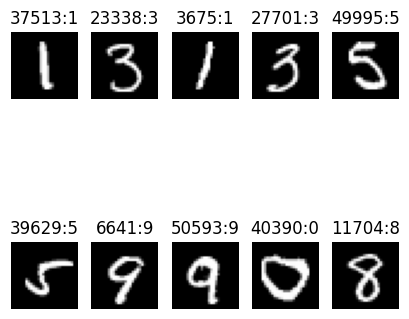

In [10]:
showcase = np.random.choice(60000,10)
showcase_x = [x_train[i] for i in showcase]
showcase_y = [y_train[i] for i in showcase]

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(5, 5))
axes = axes.flatten()
for i, img in enumerate(showcase_x):
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(str(showcase[i])+":"+str(showcase_y[i]))
    axes[i].axis('off')
plt.show()

Show testdata前5筆

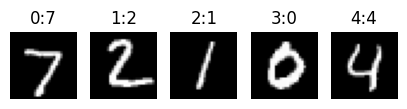

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(5, 5))
axes = axes.flatten()
for i, img in enumerate(x_test[:5]):
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(str(i)+":"+str(y_test[i]))
    axes[i].axis('off')
plt.show()

In [18]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# 設定圖像尺寸參數
image_size = (28, 28)
batch_size = 32
epochs = 10

# 載入數據集
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 28, 28, 1).astype('float32')/ 255.0
x_test = x_test.reshape(10000, 28, 28, 1).astype('float32')/ 255.0

y_train_binary = (y_train == 0).astype('float32')
y_test_binary = (y_test == 0).astype('float32')

# 建立CNN模型
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# 輸出模型各層的參數狀況
model.summary()

# 編譯模型
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['accuracy']
)

# 訓練模型
model.fit(
    x_train, y_train_binary,
    epochs=epochs,
    validation_data=(x_test, y_test_binary)
)
model.save('model.h5')

# 測試模型
train_loss, train_accuracy = model.evaluate(x_test, y_test_binary)
val_loss, val_accuracy = model.evaluate(x_test, y_test_binary)
test_loss, test_accuracy = model.evaluate(x_test, y_test_binary)
print('Train accuracy:', train_accuracy)
print('Validation accuracy:', val_accuracy)
print('Test accuracy:', test_accuracy)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_43 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_44 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_44 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_45 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_45 (MaxPooli  (None, 1, 1, 128)       

Epoch 1/10
1875/1875 [==============================] - 13s 5ms/step - loss: 0.0305 - accuracy: 0.9906 - val_loss: 0.0192 - val_accuracy: 0.9952
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0115 - accuracy: 0.9964 - val_loss: 0.0079 - val_accuracy: 0.9978
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0078 - accuracy: 0.9975 - val_loss: 0.0080 - val_accuracy: 0.9982
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0061 - accuracy: 0.9984 - val_loss: 0.0100 - val_accuracy: 0.9980
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 0.0080 - val_accuracy: 0.9986
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0038 - accuracy: 0.9990 - val_loss: 0.0082 - val_accuracy: 0.9981
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0032 - accuracy: 0.9992 - val_loss: 0.0157 - val_accuracy

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 1s 3ms/step - loss: 0.0102 - accuracy: 0.9985
Train accuracy: 0.9984999895095825
Validation accuracy: 0.9984999895095825
Test accuracy: 0.9984999895095825
